In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import seaborn as sns
import torch 


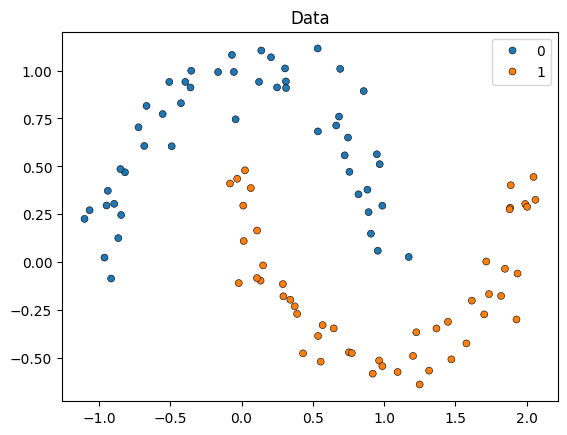

Epoch 0: loss=0.659878671169281
Epoch 1: loss=0.6546943783760071
Epoch 2: loss=0.6446757316589355
Epoch 3: loss=0.6306301355361938
Epoch 4: loss=0.613721489906311
Epoch 5: loss=0.5952416658401489
Epoch 6: loss=0.5768679976463318
Epoch 7: loss=0.559964120388031
Epoch 8: loss=0.5455827116966248
Epoch 9: loss=0.5344594717025757
Epoch 10: loss=0.5267866849899292
Epoch 11: loss=0.5220520496368408
Epoch 12: loss=0.5193407535552979
Epoch 13: loss=0.5169860124588013
Epoch 14: loss=0.5134958028793335
Epoch 15: loss=0.5071561932563782
Epoch 16: loss=0.4968481957912445
Epoch 17: loss=0.48275405168533325
Epoch 18: loss=0.46513038873672485
Epoch 19: loss=0.4445839822292328
Epoch 20: loss=0.42283865809440613
Epoch 21: loss=0.4017605483531952
Epoch 22: loss=0.3830103278160095
Epoch 23: loss=0.3673340082168579
Epoch 24: loss=0.356241911649704
Epoch 25: loss=0.3498919606208801
Epoch 26: loss=0.34785446524620056
Epoch 27: loss=0.3493042290210724
Epoch 28: loss=0.3525427579879761
Epoch 29: loss=0.3571387

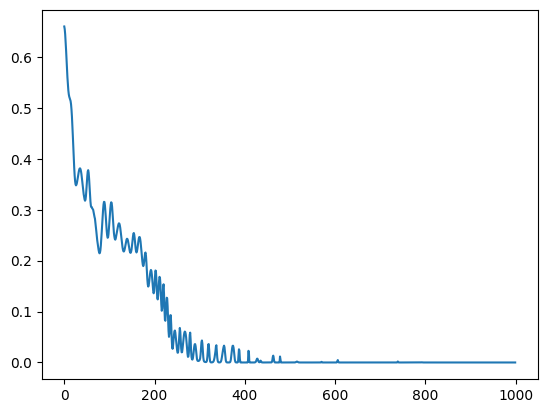

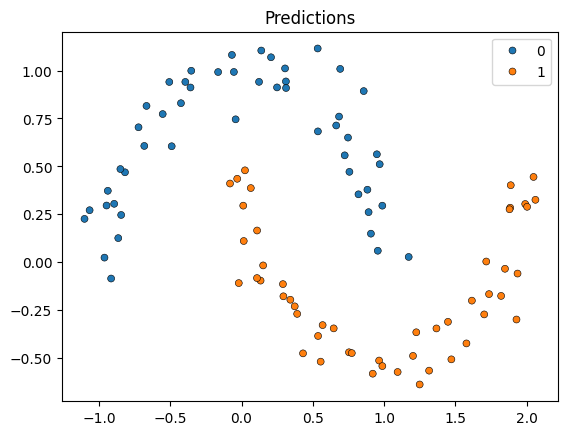

In [2]:

points, labels = make_moons(n_samples=100, shuffle=True, noise=0.1, random_state=0)

sns.scatterplot(
    x=points[:, 0], y=points[:, 1], hue=labels, marker="o", s=25, edgecolor="k", legend=True
).set_title("Data")
plt.show()

learning_rate = 0.01
n_epochs = 1000

X = torch.from_numpy(points).to(dtype=torch.float32)
y = torch.from_numpy(labels).to(dtype=torch.float32)

# W1 = torch.randn((2, X.shape[1]))
# b1 = torch.randn((2, 1))

# W2 = torch.randn((1, W1.shape[0]))
# b2 = torch.randn((1, 1))

W1 = torch.randn((3, X.shape[1]))
b1 = torch.zeros((3, 1))

W2 = torch.randn((5, W1.shape[0]))
b2 = torch.zeros((5, 1))

W3 = torch.randn((1, W2.shape[0]))
b3 = torch.zeros((1, 1))

parameters = [W1, b1, W2, b2, W3, b3]

for p in parameters:
    p.requires_grad = True

loss = []

for i in range(n_epochs):
    a1 = (W1 @ X.T + b1).relu()
    a2 = (W2 @ a1 + b2).relu()
    a3 = (W3 @ a2 + b3).sigmoid()
    
    Y = a3.squeeze(0)

    L = torch.nn.functional.binary_cross_entropy(Y, y)
    loss.append(L.item())
    print(f'Epoch {i}: loss={L.item()}')
    L.backward()

    for p in parameters:
        p.data -= learning_rate * p.grad

plt.plot(loss)
plt.show()

predictions = Y.detach().numpy() 
predictions = (predictions > 0.5).astype(int)

sns.scatterplot(
    x=points[:, 0], y=points[:, 1], hue=predictions, marker="o", s=25, edgecolor="k", legend=True
).set_title("Predictions")
plt.show()

## MLP Class

In [12]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


class MLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, activations):
        super(MLP, self).__init__()
        layers = []
        layer_sizes = [input_size] + hidden_sizes + [output_size]
        for i in range(len(layer_sizes) - 1):
            layers.append(nn.Linear(layer_sizes[i], layer_sizes[i+1]))
            if i < len(activations):
                layers.append(activations[i])
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

## Dataset and model

In [13]:

points, labels = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=0)


X = torch.from_numpy(points).to(dtype=torch.float32)
y = torch.from_numpy(labels).to(dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

input_size = X.shape[1]
hidden_sizes = [64, 32]
output_size = 2
activations = [nn.ReLU(), nn.ReLU()]

model = MLP(input_size, hidden_sizes, output_size, activations)

C:\Users\Admin\AppData\Local\Temp\ipykernel_24060\2087298295.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.long)


## Dataloader, loss & optimizer

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

## Training loop

In [21]:

num_epochs = 10
for epoch in range(num_epochs):
    for inputs, targets in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')


Epoch 1, Loss: 4.0290786273544654e-05
Epoch 2, Loss: 6.407440650946228e-06
Epoch 3, Loss: 0.0005105054005980492
Epoch 4, Loss: 8.192982932087034e-05
Epoch 5, Loss: 0.0004787481448147446
Epoch 6, Loss: 0.0012410256313160062
Epoch 7, Loss: 9.054724068846554e-05
Epoch 8, Loss: 4.087218621862121e-05
Epoch 9, Loss: 0.07750430703163147
Epoch 10, Loss: 9.410155325895175e-05
